In [2]:
# library imports
import csv
import nltk
import pandas as pd
import numpy as np

In [3]:
# import NDP file (~3GB of plain text)
ndp_file = "/Users/jessicawilliams/ipsw-files/227-www-ndp-ca.txt"

In [4]:
# load the NDP plain text as a dataframe
df = pd.read_csv(ndp_file, sep = ",", usecols=[0,1,2,3], header=None, error_bad_lines=False, quoting=csv.QUOTE_NONE)
df = df.sort_values(0)

In [5]:
# find a homepage to focus on for the diffs
homepages = df.loc[df[2] == "http://www.ndp.ca/"]

In [6]:
# how many homepages are there?
len(homepages);

In [7]:
# let's look at one record
# should be the first crawl in the collection
homepages.iloc[0].tolist();

In [8]:
# let's now iterate through each pair of pages, diffing them 
# with each other. 
# we then create a list of lists, which can feed into a DF
#

final = []
for y in range (0,len(homepages)-1):
    first_page = homepages.iloc[y].tolist()
    second_page = homepages.iloc[y+1].tolist()
    distance = nltk.edit_distance(first_page[3],second_page[3])
    data = first_page[0],first_page[2],second_page[0],second_page[2],distance
    final.append(list(data))

In [9]:
ndp_diffs = pd.DataFrame(final, columns=['origin_date','origin_url','target_date','target_url','diff'])

In [10]:
# let's see the pages with the largest diffs

sorted = ndp_diffs.sort_values('diff',ascending=False)

# Screenshot the Fifteen Biggest Diffs?

In [15]:
biggest_diffs = []
for x in range(0,14):
    biggest_diffs.append("https://wayback.archive-it.org/227/" + sorted.iloc[x].tolist()[2][1:] + "/" + sorted.iloc[x].tolist()[3])

In [16]:
from selenium import webdriver

DRIVER = 'chromedriver'
driver = webdriver.Chrome(DRIVER)

count=1
for page in biggest_diffs:
    driver.get(page);
    export_file=str(count)+"-ndp.png"
    count=count+1
    screenshot = driver.save_screenshot(export_file)
    
driver.quit()

In [28]:
# import the necessary packages
from skimage import measure # pip3 install scikit-image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [48]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s = measure.compare_ssim(imageA, imageB)

	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))

	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")

	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")

	# show the images
	plt.show()

In [51]:
# load the images -- the original, the original + contrast,
# and the original + photoshop
old = cv2.imread("/Users/jessicawilliams/ipsw-quantifying-change/ndp-diff-images/edit-distance/01-ORIGIN-ndp.png")
new = cv2.imread("/Users/jessicawilliams/ipsw-quantifying-change/ndp-diff-images/edit-distance/01-TARGET-ndp.png")
 
# convert the images to grayscale
old = cv2.cvtColor(old, cv2.COLOR_BGR2GRAY)
new = cv2.cvtColor(new, cv2.COLOR_BGR2GRAY)

# fig = plt.figure()
# fig.add_subplot(1, 2, 1)
# plt.imshow(old, cmap = plt.cm.gray)
# fig.add_subplot(1,2,2)
# plt.imshow(new, cmap = plt.cm.gray)

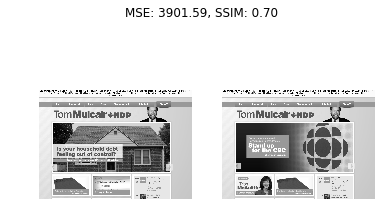

In [52]:
# compare the images
compare_images(old, new, "Old vs. New")